<a href="https://colab.research.google.com/github/DingLi23/s2search/blob/pipelining/pipelining/exp9/exp9_cslg_clusterC_variant.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Experiment Description

Plot the PDP of a picked sample from cluster C of querying 'Machine Learning' in cslg.

> This notebook is for experiment \<exp9\> and data sample \<6695995-cslg-varient-in-*\>.

### Initialization

In [7]:
%load_ext autoreload
%autoreload 2
import numpy as np, sys, os
in_colab = 'google.colab' in sys.modules
# fetching code and data(if you are using colab
if in_colab:
    !rm -rf s2search
    !git clone --branch pipelining https://github.com/youyinnn/s2search.git
    sys.path.insert(1, './s2search')
    %cd s2search/pipelining/exp9/

pic_dir = os.path.join('.', 'plot')
if not os.path.exists(pic_dir):
    os.mkdir(pic_dir)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading data

In [8]:
sys.path.insert(1, '../../')
import numpy as np, sys, os
from getting_data import get
from feature_masking import masking_options

sample_id = '6695995'

f_list = ['title', 'abstract', 'venue', 'authors', 'year', 'citation']

map = {}

for f in f_list:
    sample_data_and_config_arr = get('exp9', f'{sample_id}-cslg-variant-in-{f}')
    for sample_data_and_config in sample_data_and_config_arr:
        y_values = []
        sample_origin_npy = sample_data_and_config['origin']
        for array in sample_data_and_config['feature_stack']:

            # define your y axis value here
            # y_value = np.absolute((sample_origin_npy - array) / sample_origin_npy)
            y_value = (array)
            y_values.append(y_value)

        y_values = np.array(y_values)
        sample_data_and_config['y_values'] = y_values
    map[f] = sample_data_and_config_arr[0]

Got sample data: 6695995-cslg-variant-in-title
Got sample data: 6695995-cslg-variant-in-abstract
Got sample data: 6695995-cslg-variant-in-venue
Got sample data: 6695995-cslg-variant-in-authors
Got sample data: 6695995-cslg-variant-in-year
Got sample data: 6695995-cslg-variant-in-citation


### PDP of Cluster C

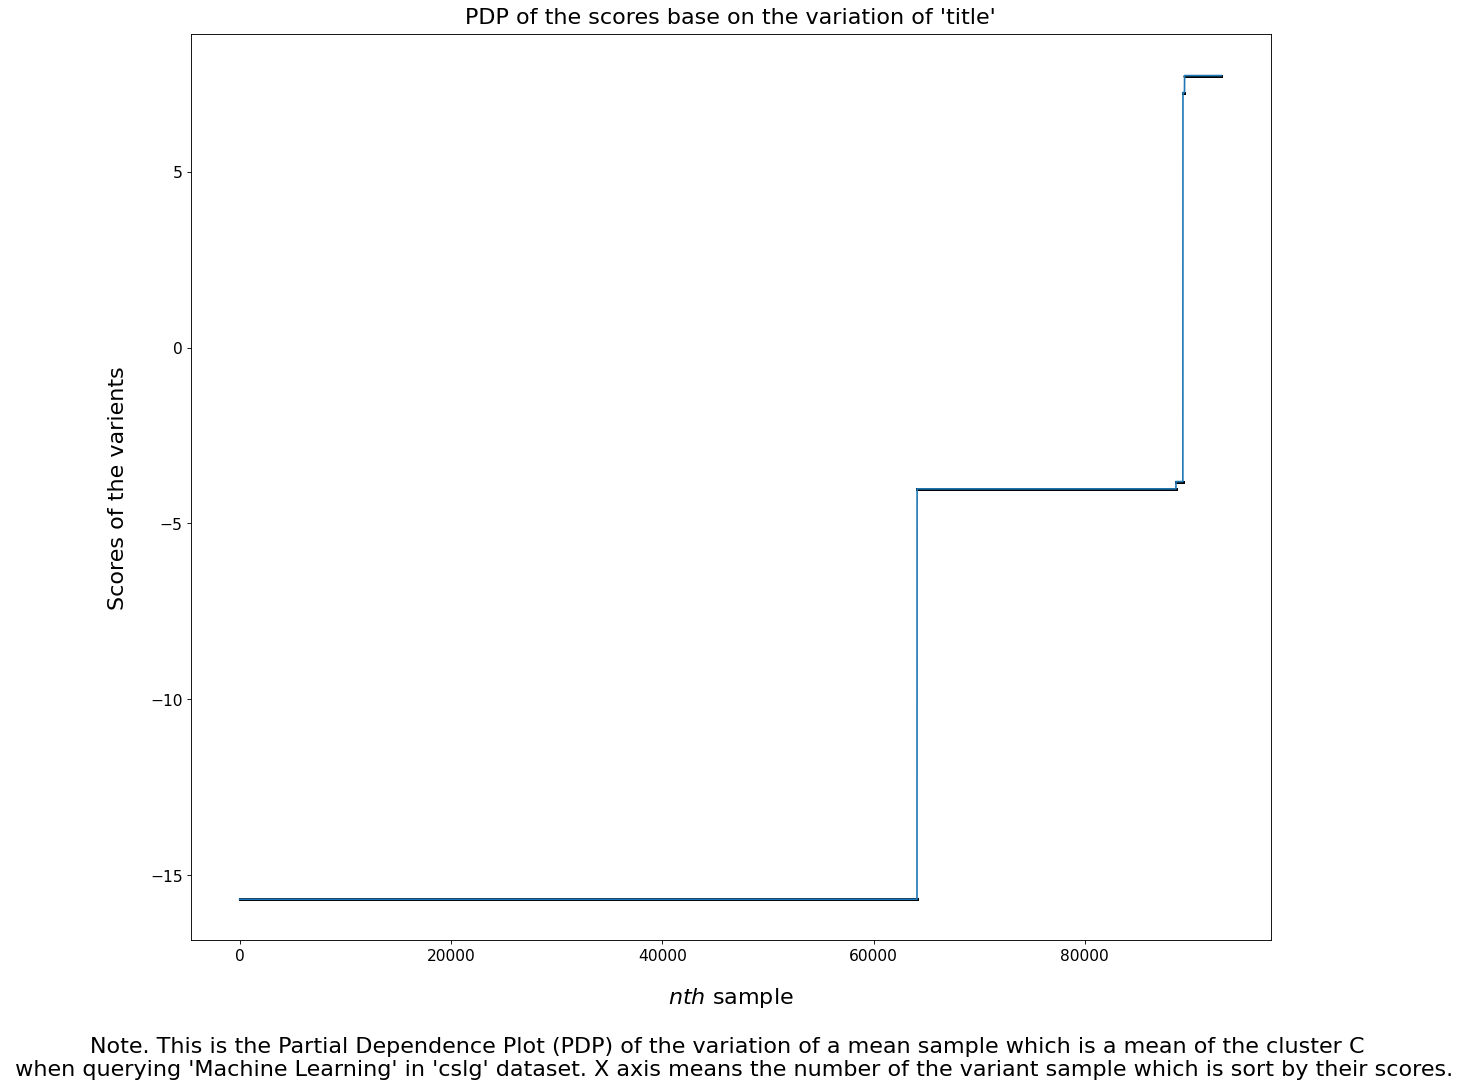

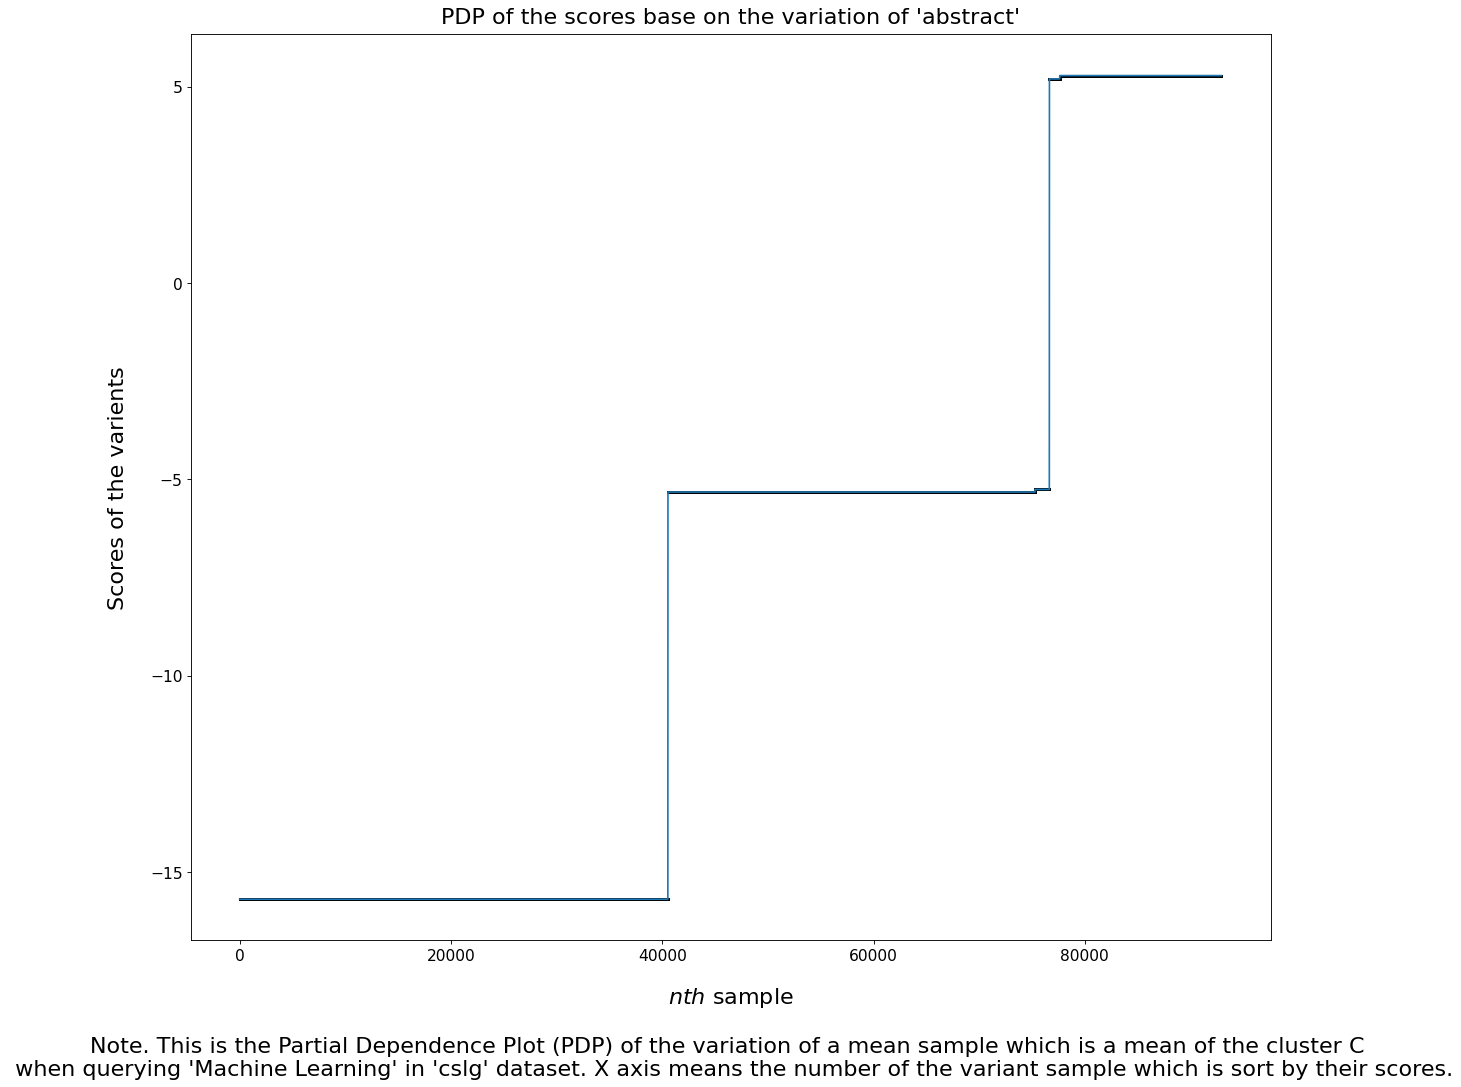

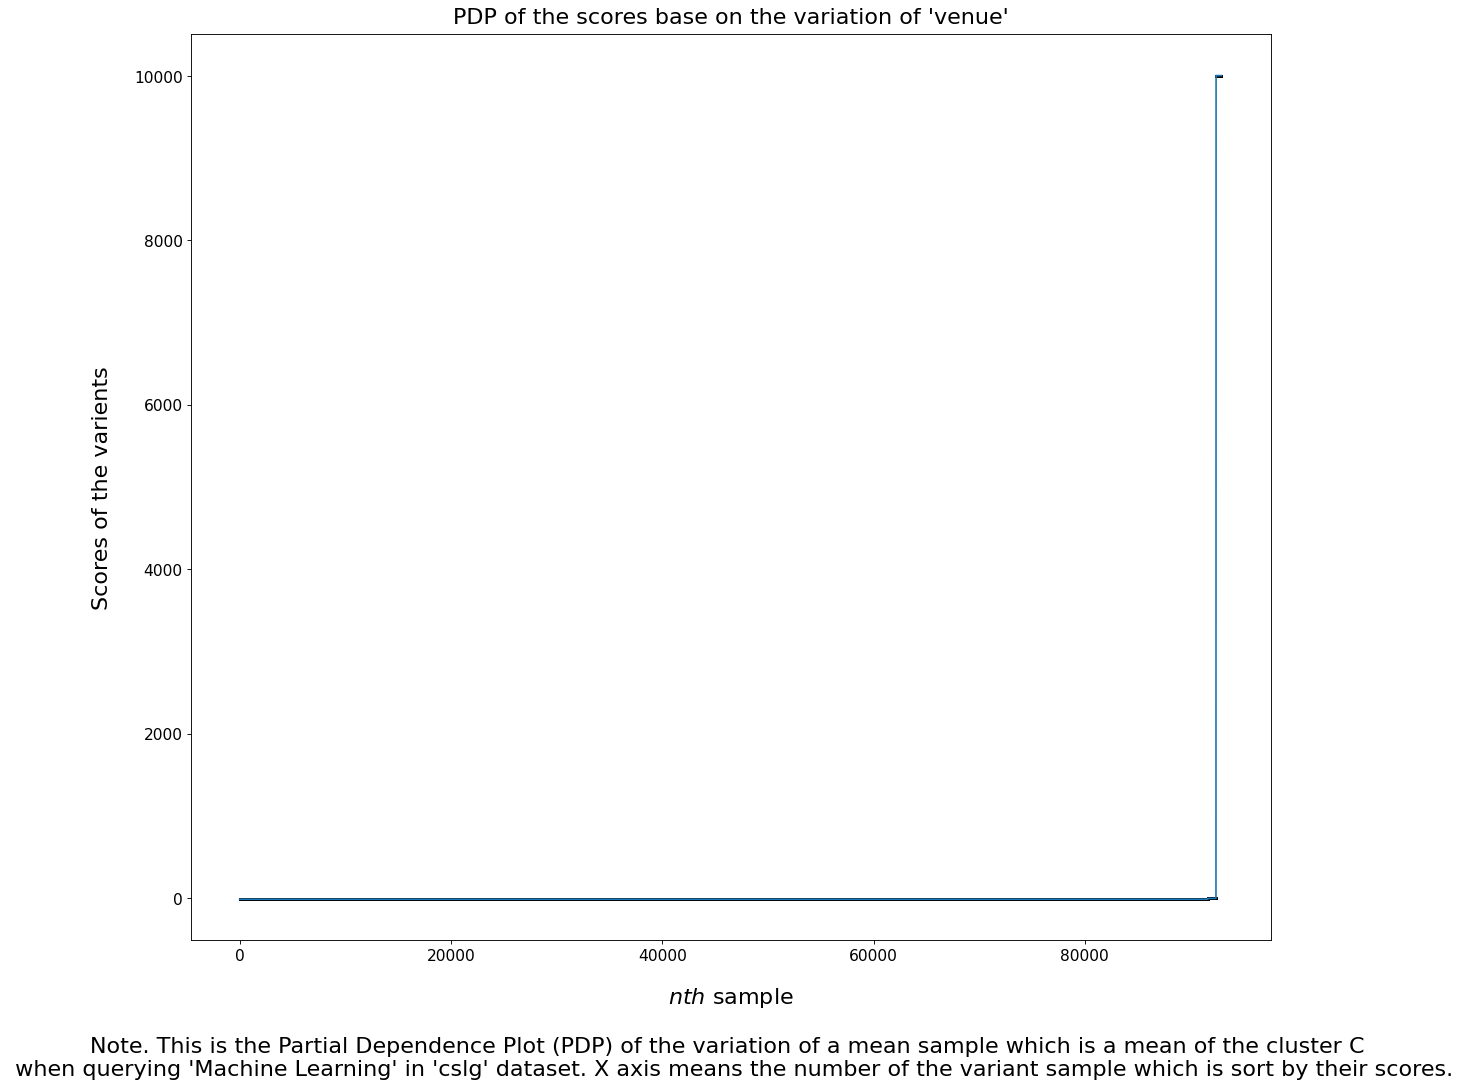

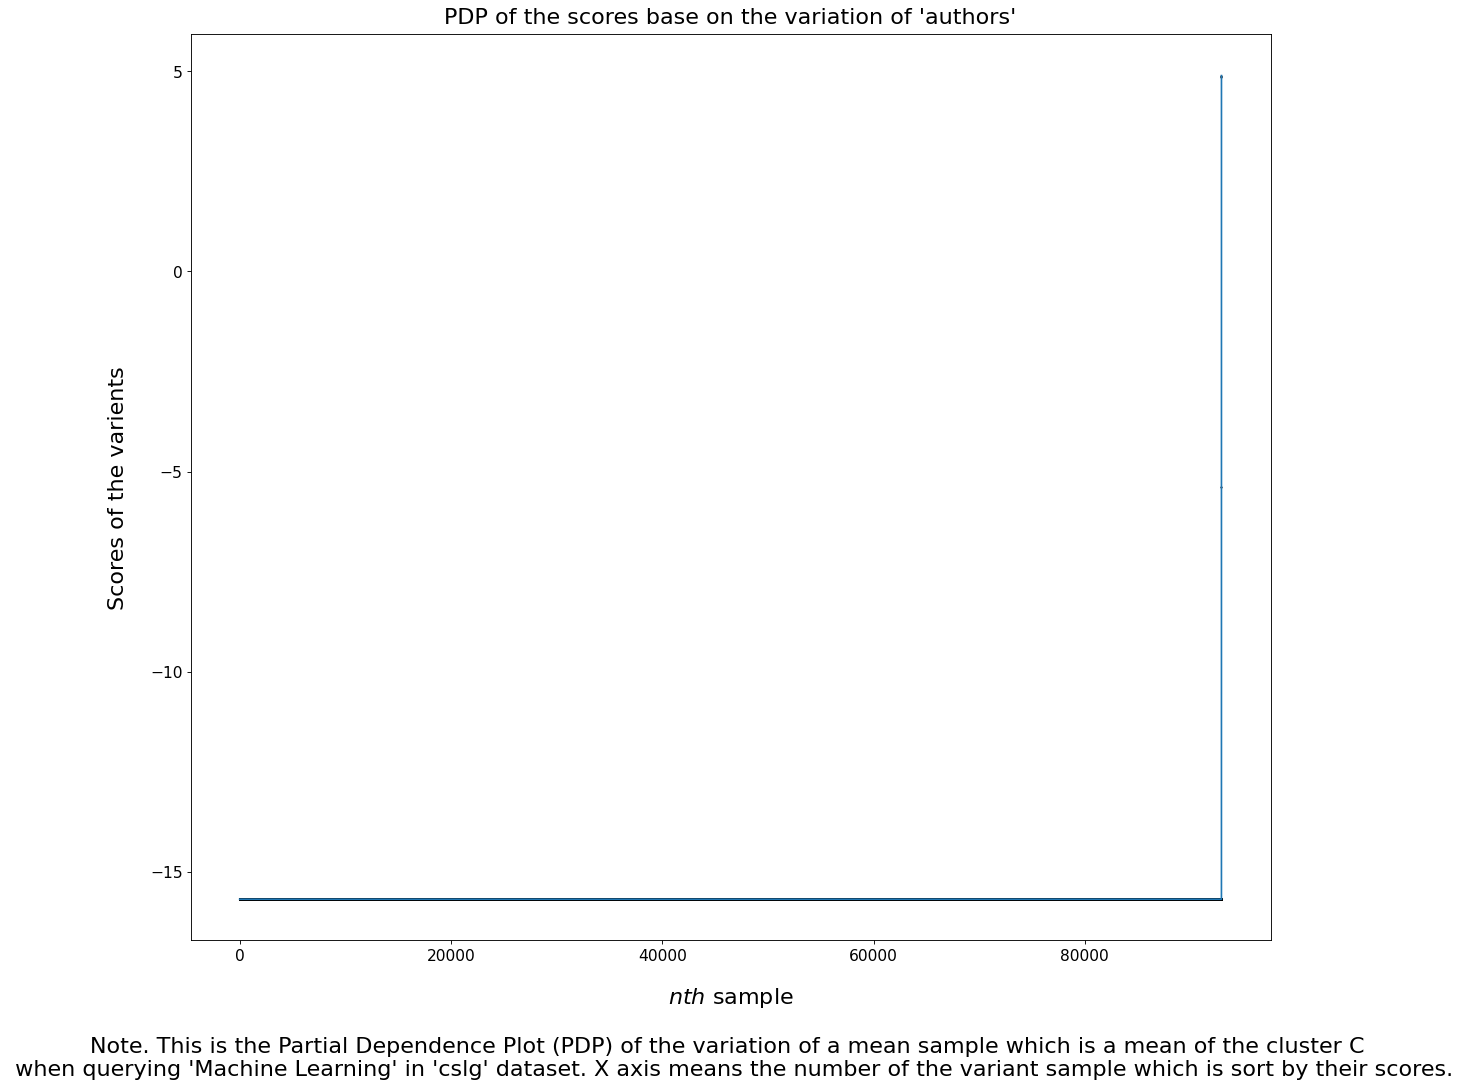

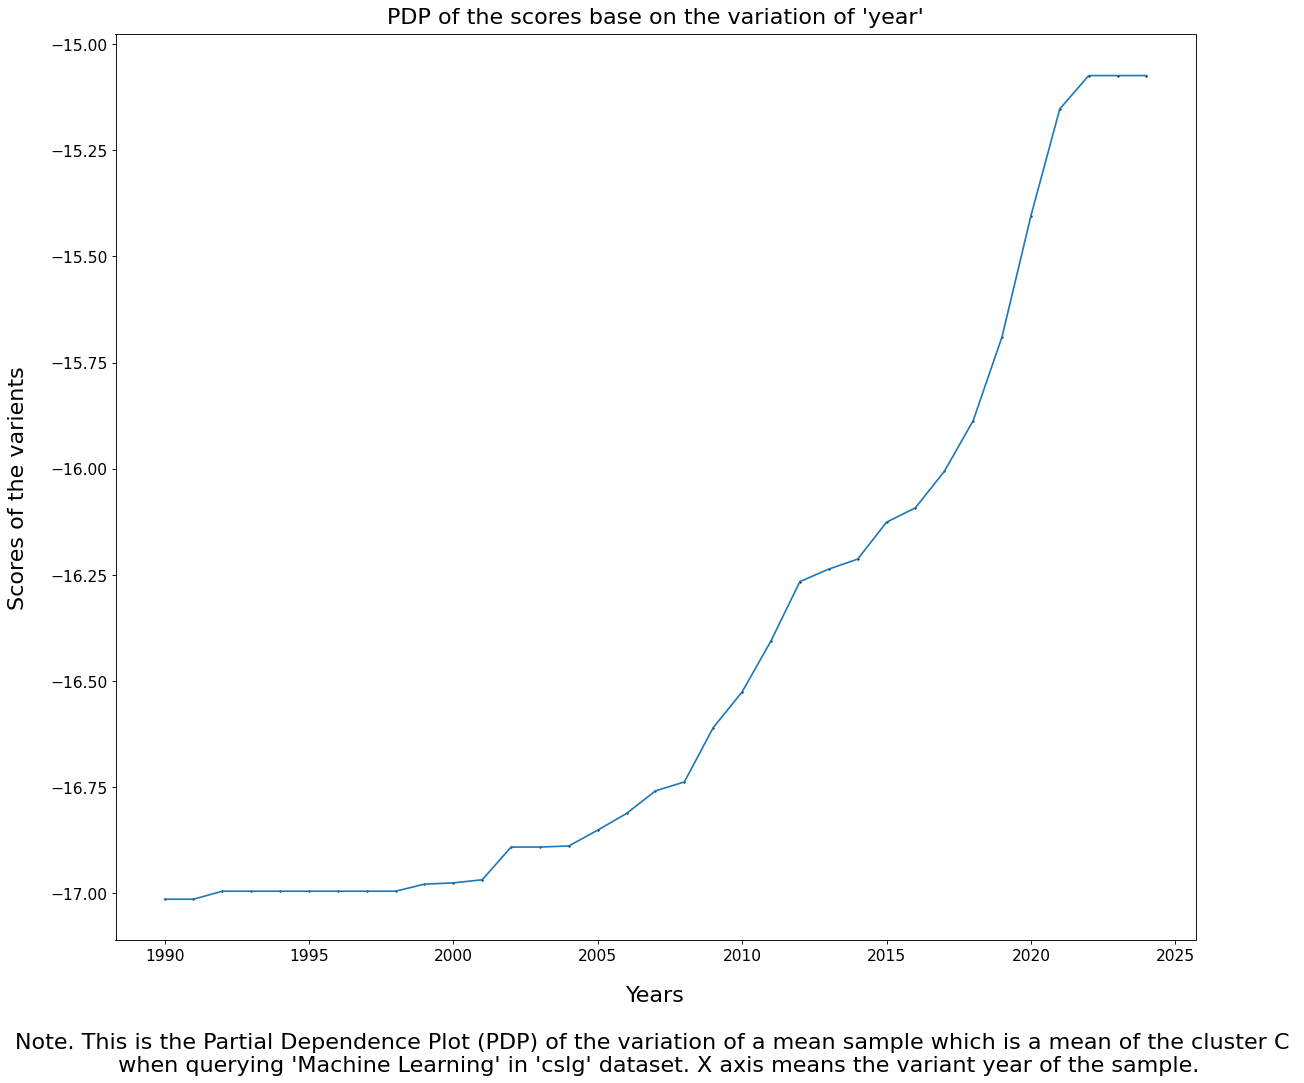

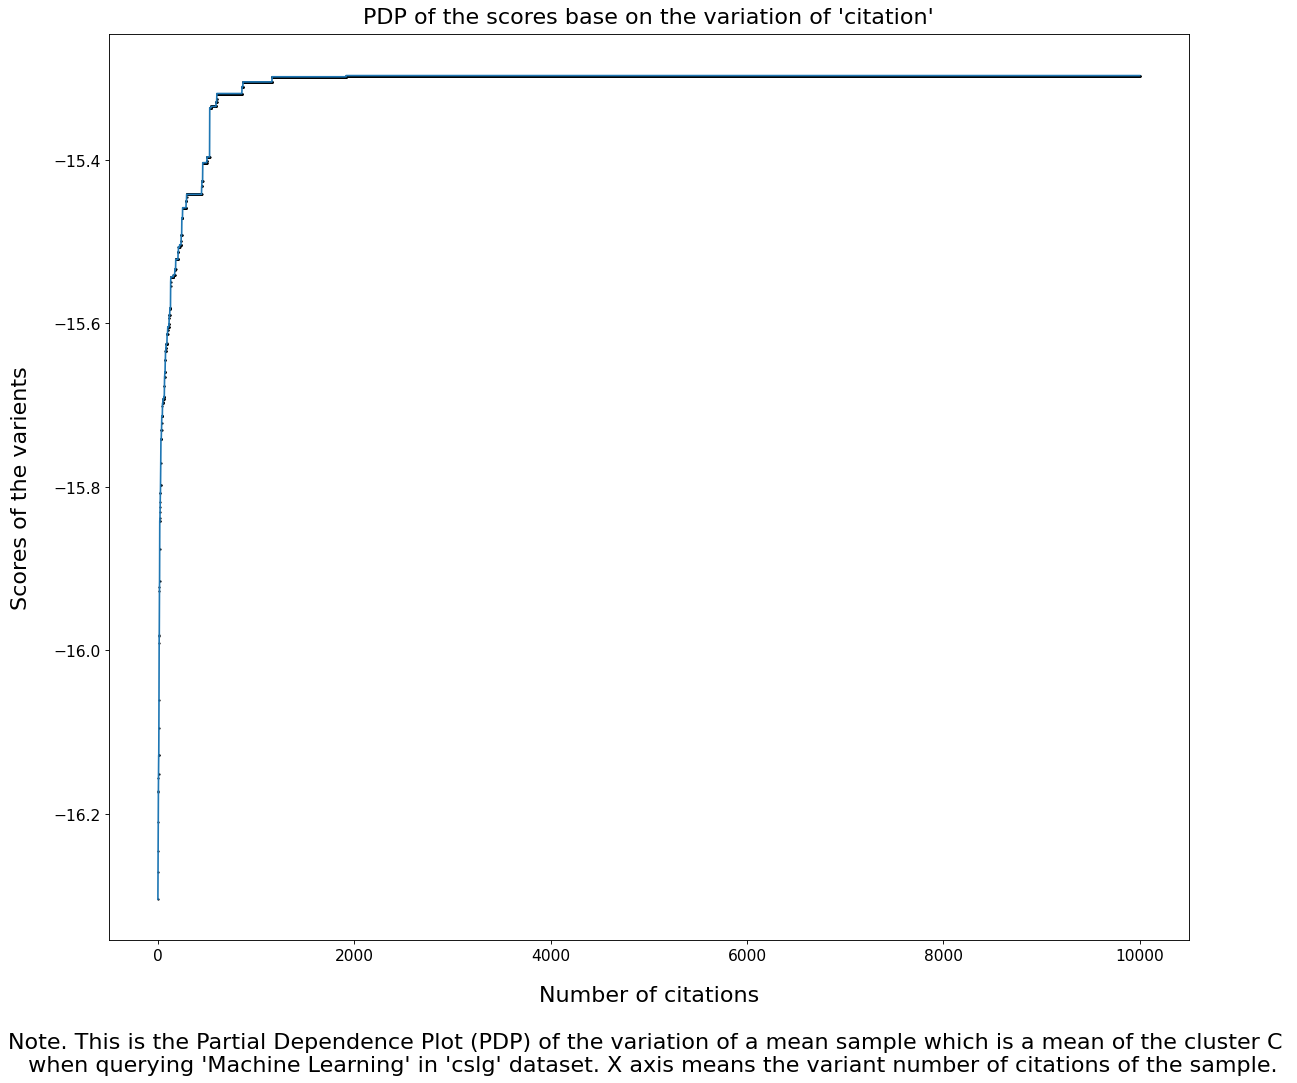

In [9]:
import matplotlib.pyplot as plt

def plot_pdp(x, y, xlabel, ylabel, sample_name, feature_name, caption=''): 
  plt.figure(figsize=(20, 15), dpi=80)
  plt.scatter(
    x,
    y,
    s=1,
    c='black', 
    marker='o',
  )
  plt.plot(x, y)
  
  plt.xlabel( f'{xlabel}\n\n' + 'Note. ' + caption, fontsize=20, labelpad=20)
  plt.ylabel(ylabel, fontsize=20, labelpad=20)
  plt.title(f'PDP of the scores base on the variation of \'{feature_name}\'', fontsize=20, pad=10)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.subplots_adjust(right=0.8)

  plt.savefig(os.path.join('.', 'plot', f'{sample_name}-{feature_name}.png'), facecolor='white', transparent=False, bbox_inches='tight')
  plt.show()

plot_pdp(
  list(range(len(map['title']['origin']))),
  np.sort(map['title']['origin']),
  "$nth$ sample",
  "Scores of the varients",
  "mean-sample-of-clusterC-in-cslg",
  'title',
  "This is the Partial Dependence Plot (PDP) of the variation of a mean sample which is a mean of the cluster C \n " + 
  "when querying 'Machine Learning' in 'cslg' dataset. X axis means the number of the variant sample which is sort by their scores."
)

plot_pdp(
  list(range(len(map['abstract']['origin']))),
  np.sort(map['abstract']['origin']),
  "$nth$ sample",
  "Scores of the varients",
  "mean-sample-of-clusterC-in-cslg",
  'abstract',
  "This is the Partial Dependence Plot (PDP) of the variation of a mean sample which is a mean of the cluster C \n " + 
  "when querying 'Machine Learning' in 'cslg' dataset. X axis means the number of the variant sample which is sort by their scores."
)

plot_pdp(
  list(range(len(map['venue']['origin']))),
  np.sort(map['venue']['origin']),
  "$nth$ sample",
  "Scores of the varients",
  "mean-sample-of-clusterC-in-cslg",
  'venue',
  "This is the Partial Dependence Plot (PDP) of the variation of a mean sample which is a mean of the cluster C \n " + 
  "when querying 'Machine Learning' in 'cslg' dataset. X axis means the number of the variant sample which is sort by their scores."
)

plot_pdp(
  list(range(len(map['authors']['origin']))),
  np.sort(map['authors']['origin']),
  "$nth$ sample",
  "Scores of the varients",
  "mean-sample-of-clusterC-in-cslg",
  'authors',
  "This is the Partial Dependence Plot (PDP) of the variation of a mean sample which is a mean of the cluster C \n " + 
  "when querying 'Machine Learning' in 'cslg' dataset. X axis means the number of the variant sample which is sort by their scores."
)

plot_pdp(
  list(range(1990, 2025)),
  map['year']['origin'][1990:2025],
  "Years",
  "Scores of the varients",
  "mean-sample-of-clusterC-in-cslg",
  'year',
  "This is the Partial Dependence Plot (PDP) of the variation of a mean sample which is a mean of the cluster C \n " + 
  "when querying 'Machine Learning' in 'cslg' dataset. X axis means the variant year of the sample."
)

plot_pdp(
  list(range(10000)),
  map['citation']['origin'],
  "Number of citations",
  "Scores of the varients",
  "mean-sample-of-clusterC-in-cslg",
  'citation',
  "This is the Partial Dependence Plot (PDP) of the variation of a mean sample which is a mean of the cluster C \n " + 
  "when querying 'Machine Learning' in 'cslg' dataset. X axis means the variant number of citations of the sample."
)

